In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation
from PIL import Image
# import cv2


In [2]:
def random_walk(graph, path_length = 1000):
    #Random Walk
    start_state = np.random.choice(range(graph.shape[0]))
    current_state = start_state
    path = np.zeros(path_length)
    for i in range(path_length):
        path[i] = current_state
        neighbour_states = np.where(graph[current_state])[0]
        next_state = np.random.choice(neighbour_states)
        current_state = next_state
    return path
def create_adjacency_matrix_for_modular_graph(num_nodes, num_modules, module_sizes, inter_module_edges, boundary_nodes):
  """
  Creates an adjacency matrix for a graph with modular structure.

  Args:
    num_nodes: The total number of nodes in the graph.
    num_modules: The number of modules in the graph.
    module_sizes: A list of the sizes of each module.
    inter_module_edges: A list of edges between modules.

  Returns:
    An adjacency matrix for the graph.
  """

  # Create an empty adjacency matrix.
  adj_matrix = np.zeros((num_nodes, num_nodes))

  # Add edges within each module.
  for module_index in range(num_modules):
    module_start_index = sum(module_sizes[:module_index])
    module_end_index = module_start_index + module_sizes[module_index]

    for node_index in range(module_start_index, module_end_index):
      for other_node_index in range(module_start_index, module_end_index):
        if node_index != other_node_index:
          adj_matrix[node_index, other_node_index] = 1
        
  for node_i in boundary_nodes:
    for node_j in boundary_nodes:
      adj_matrix[node_i][node_j] = 0

  # Add edges between modules.
  for edge in inter_module_edges:
    node_index_1, node_index_2 = edge
    adj_matrix[node_index_1, node_index_2] = 1
    adj_matrix[node_index_2, node_index_1] = 1

  return adj_matrix


modular_graph = create_adjacency_matrix_for_modular_graph(15, 3, [5, 5, 5], [(0, 14), (4, 5), (9, 10)], [0, 4, 5, 9, 10, 14])

In [3]:
image_paths = np.array(['demo_images/' + i for i in os.listdir('demo_images/')])

In [4]:
images = image_paths[random_walk(modular_graph).astype(int)]


0
10
20
30
40
50
60
70
80
90


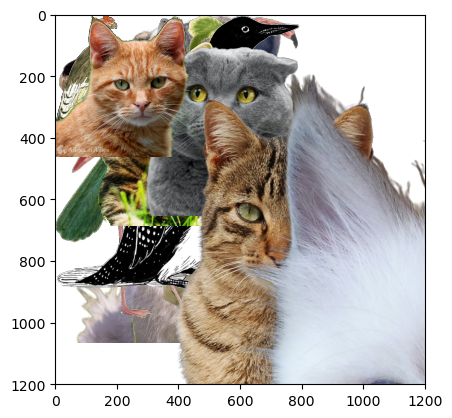

In [7]:
fig, ax = plt.subplots()
ax.set_xlim([0, 1200])
ax.set_ylim([1200, 0])
ims = []
for i in range(100):
    im = ax.imshow(plt.imread(images[i]), animated = True)
    if i%10 == 0:
        print(i)
    ims.append([im])

    

In [6]:
ani = animation.ArtistAnimation(fig, ims, interval=300, blit = True, repeat_delay = 1000)


In [115]:
ani.save('demo.mp4')